In [2]:
import requests
import random
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stat
from datetime import date
from config import api_key
from citipy import citipy


In [3]:
def FeelingRegressed(x, y):
    slope, intr, r, p, stderr = stat.linregress(x,y)
    newY = slope * x + intr
    return newY

In [4]:
today = date.today()
strDate = today.strftime("%m/%d/%y")

In [5]:
#get cities
#lat -90->90
#lon -180->180
foundCities = 0
cityNames = []
cityData = []
while foundCities < 500:
    findLat = random.uniform(-90.00, 90.00)
    findLon = random.uniform(-180.00, 180.00)
    #temp humidity, cloudiness, windspeed
    cityName = citipy.nearest_city(findLat, findLon).city_name
    if cityName not in cityNames:
        url = "http://api.openweathermap.org/data/2.5/weather?q=" + cityName + "&appid=" + api_key + "&units=imperial"
        cityJson = requests.get(url).json()
        try:
            cityInfo = {'City': cityName,
                        'Temperature (F)': cityJson['main']['temp'],
                        'Humidity %': cityJson['main']['humidity'],
                        'Cloudiness %': cityJson['clouds']['all'],
                        'Wind Speed (mph)': cityJson['wind']['speed'],
                        'Latitude': cityJson['coord']['lat'],
                        'Longitude': cityJson['coord']['lon'],
                        'Country': cityJson['sys']['country']}
            
            cityNames.append(cityName)
            cityData.append(cityInfo)
            
            print(f'{cityName} added as #{foundCities+1}')
            foundCities = foundCities +1
        except:
            print(f'{cityName} not found...')
            

butaritari added as #1
sitka added as #2
kindu added as #3
goleniow added as #4
torbay added as #5
chuy added as #6
vardo added as #7
rikitea added as #8
nikolskoye added as #9
hermanus added as #10
ostrovnoy added as #11
altagracia de orituco added as #12
punta arenas added as #13
jamestown added as #14
busselton added as #15
hilo added as #16
bluff added as #17
albany added as #18
atuona added as #19
sao joao da barra added as #20
gornopravdinsk added as #21
namibe added as #22
port alfred added as #23
kaya added as #24
shupiyan added as #25
kebemer not found...
gusev added as #26
provideniya added as #27
taolanaro not found...
nyurba added as #28
kwakoa added as #29
avarua added as #30
kapaa added as #31
vaini added as #32
yellowknife added as #33
qasigiannguit added as #34
mar del plata added as #35
poum added as #36
castro added as #37
longyearbyen added as #38
nizhneyansk not found...
samusu not found...
alice town added as #39
north bend added as #40
fortuna added as #41
hami ad

tsihombe not found...
dutse added as #299
harlingen added as #300
dryden added as #301
divinopolis added as #302
prainha added as #303
quepos added as #304
bokspits not found...
port blair added as #305
lavrentiya added as #306
kisangani added as #307
taolanaro not found...
stepnyak added as #308
samusu not found...
qorveh added as #309
mahabad added as #310
cherskiy added as #311
ternate added as #312
panacan added as #313
taolanaro not found...
hovd added as #314
ofunato added as #315
comodoro rivadavia added as #316
balykshi not found...
illoqqortoormiut not found...
san juan added as #317
la gaulette not found...
chumikan added as #318
mayo added as #319
taolanaro not found...
romny added as #320
grand-santi added as #321
mys shmidta not found...
sinnamary added as #322
itoman added as #323
pacific grove added as #324
zimovniki added as #325
barentsburg not found...
yatou added as #326
aykhal added as #327
maceio added as #328
sovetskiy added as #329
tumannyy not found...
moctezuma

In [8]:
dfCities = pd.DataFrame(cityData)

dfCities.head()

,City,Temperature (F),Humidity %,Cloudiness %,Wind Speed (mph),Latitude,Longitude,Country
0,butaritari,84.52,76,100,11.95,3.07,172.79,KI
1,sitka,43.07,56,75,8.05,57.05,-135.33,US
2,kindu,69.22,85,97,0.78,-2.95,25.95,CD
3,goleniow,37.15,80,30,2.24,53.56,14.83,PL
4,torbay,32.23,47,20,11.41,47.67,-52.73,CA


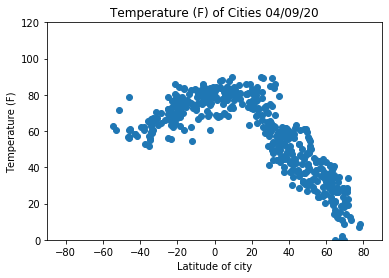

In [9]:
plt.scatter(dfCities['Latitude'], dfCities['Temperature (F)'])
plt.xlim(-90, 90)
plt.ylim(0,120)

plt.title('Temperature (F) of Cities '+ strDate)
plt.xlabel('Latitude of city')
plt.ylabel('Temperature (F)')
plt.savefig('Images/TempVLat')
plt.show()

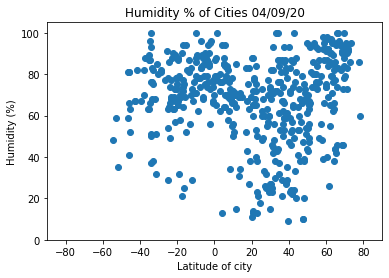

In [10]:
plt.scatter(dfCities['Latitude'], dfCities['Humidity %'])
plt.xlim(-90, 90)
plt.ylim(0,105)

plt.title('Humidity % of Cities ' + strDate)
plt.xlabel('Latitude of city')
plt.ylabel('Humidity (%)')
plt.savefig('Images/HumidityVLat')
plt.show()


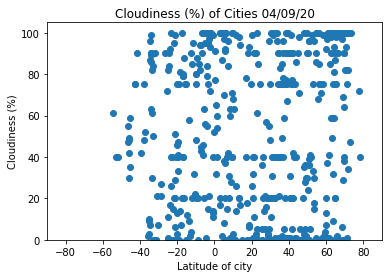

In [11]:
plt.scatter(dfCities['Latitude'], dfCities['Cloudiness %'])
plt.xlim(-90, 90)
plt.ylim(0,105)

plt.title('Cloudiness (%) of Cities '+ strDate)
plt.xlabel('Latitude of city')
plt.ylabel('Cloudiness (%)')
plt.savefig('Images/CloudVLat')
plt.show()


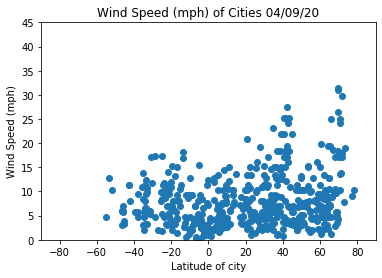

In [12]:
plt.scatter(dfCities['Latitude'], dfCities['Wind Speed (mph)'])
plt.xlim(-90, 90)
plt.ylim(0,45)

plt.title('Wind Speed (mph) of Cities '+ strDate)
plt.xlabel('Latitude of city')
plt.ylabel('Wind Speed (mph)')
plt.savefig('Images/WindVLat')
plt.show()


In [13]:
north = dfCities.loc[dfCities['Latitude'] > 0]
south = dfCities.loc[dfCities['Latitude'] < 0]
northLat = north['Latitude']
southLat = south['Latitude']

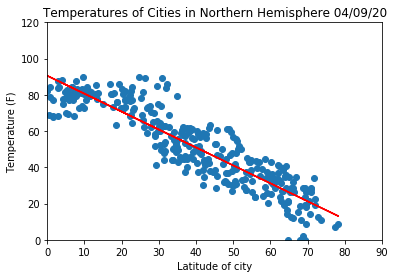

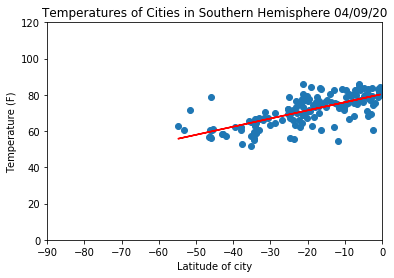

In [14]:
plt.scatter(northLat, north['Temperature (F)'])

y = FeelingRegressed(northLat, north['Temperature (F)'])
plt.plot(northLat, y, color = 'red')

plt.xlim(0, 90)
plt.ylim(0,120)
plt.title('Temperatures of Cities in Northern Hemisphere '+ strDate)
plt.xlabel('Latitude of city')
plt.ylabel('Temperature (F)')
plt.savefig('Images/TempVLatNorthRegress')
plt.show()


#--------------------------------------------------------------
plt.scatter(southLat, south['Temperature (F)'])

y = FeelingRegressed(southLat, south['Temperature (F)'])
plt.plot(southLat, y, color = 'red')

plt.xlim(-90, 0)
plt.ylim(0,120)
plt.title('Temperatures of Cities in Southern Hemisphere '+ strDate)
plt.xlabel('Latitude of city')
plt.ylabel('Temperature (F)')
plt.savefig('Images/TempVLatSouthRegress')
plt.show()


#both regression lines indicate that the further away from the equator you go, the colder it is going to be
#the graphs also indicate that the southern hemisphere is hotter at this time due to it just coming out of its summer period

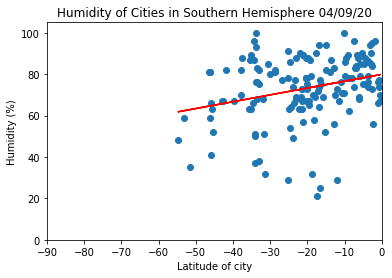

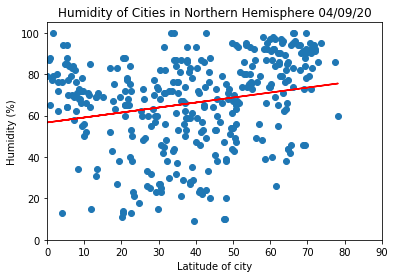

In [15]:
plt.scatter(southLat, south['Humidity %'])

y = FeelingRegressed(southLat, south['Humidity %'])

plt.plot(southLat, y, color = 'red')

plt.title('Humidity of Cities in Southern Hemisphere '+ strDate)
plt.xlim(-90, 0)
plt.ylim(0,105)
plt.xlabel('Latitude of city')
plt.ylabel('Humidity (%)')
plt.savefig('Images/HumidityVLatSouthRegress')
plt.show()



#---------------------------------------------------
plt.scatter(northLat, north['Humidity %'])

y = FeelingRegressed(northLat, north['Humidity %'])

plt.plot(northLat, y, color = 'red')

plt.title('Humidity of Cities in Northern Hemisphere '+ strDate)
plt.xlim(0, 90)
plt.ylim(0,105)
plt.xlabel('Latitude of city')
plt.ylabel('Humidity (%)')
plt.savefig('Images/HumidityVLatNorthRegress')
plt.show()


#the regression lines are less indicative of the sample for these plots. 
#in the southern hemisphere, humidity rises as you approach the equator,
#while in the northern hemisphere, the humidity is rising as you move further
#from the equator

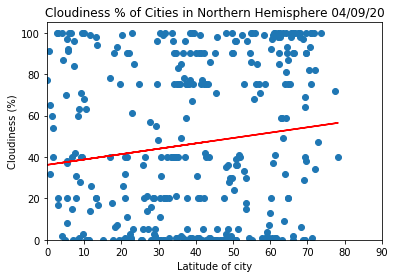

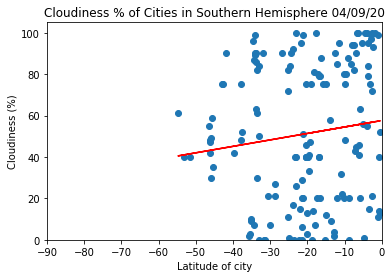

In [16]:
plt.scatter(northLat, north['Cloudiness %'])

y = FeelingRegressed(northLat, north['Cloudiness %'])

plt.plot(northLat, y, color = 'red')

plt.title('Cloudiness % of Cities in Northern Hemisphere '+ strDate)
plt.xlim(0, 90)
plt.ylim(0,105)
plt.xlabel('Latitude of city')
plt.ylabel('Cloudiness (%)')
plt.savefig('Images/CloudVLatNorthRegress')
plt.show()

#--------------------------------------------------------

plt.scatter(southLat, south['Cloudiness %'])

y = FeelingRegressed(southLat, south['Cloudiness %'])

plt.plot(southLat, y, color = 'red')

plt.title('Cloudiness % of Cities in Southern Hemisphere '+ strDate)
plt.xlim(-90, 0)
plt.ylim(0,105)
plt.xlabel('Latitude of city')
plt.ylabel('Cloudiness (%)')
plt.savefig('Images/CloudVLatSouthRegress')
plt.show()
#there doesnt appear to be much correlation at all... even though the southern hemisphere appears to have an upward 

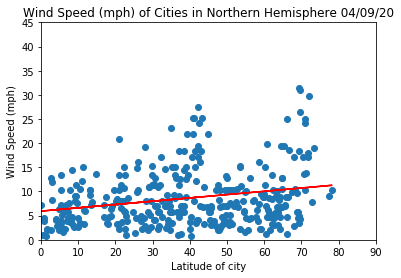

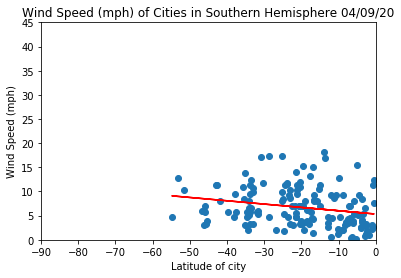

In [17]:
plt.scatter(northLat, north['Wind Speed (mph)'])

y = FeelingRegressed(northLat, north['Wind Speed (mph)'])
plt.plot(northLat, y, color = 'red')

plt.title('Wind Speed (mph) of Cities in Northern Hemisphere '+ strDate)
plt.xlim(-0, 90)
plt.ylim(0,45)
plt.xlabel('Latitude of city')
plt.ylabel('Wind Speed (mph)')
plt.savefig('Images/WindVLatNorthRegress')
plt.show()

#--------------------------------------------------------------

plt.scatter(southLat, south['Wind Speed (mph)'])

y = FeelingRegressed(southLat, south['Wind Speed (mph)'])
plt.plot(southLat, y, color = 'red')

plt.title('Wind Speed (mph) of Cities in Southern Hemisphere '+ strDate)
plt.xlim(-90, 0)
plt.ylim(0,45)
plt.xlabel('Latitude of city')
plt.ylabel('Wind Speed (mph)')
plt.savefig('Images/WindVLatSouthRegress')
plt.show()

#wind speed doesnt appear to be affected by latitude

In [18]:
dfCities.to_csv('cities.csv', index=False)